# Principal Component Analysis

Principal Component Analysis or PCA is a unsupervised machine learning algorithm which helps in dimensionality reduction of the feature space so that we can use uncorrelated features and only the features that matter.

### Importing Required Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from keras.datasets import mnist

### Helper Functions

In [2]:
def equal_matrix(A, B, err = 1e-10):
    return (A - B <= err).all()

### Data Generation

(-1.2, 1.2)

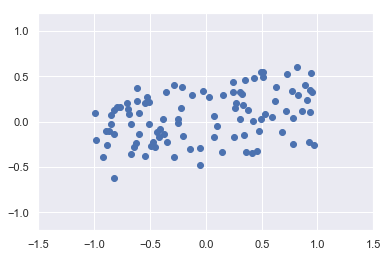

In [25]:
# Initializing the environment for the data
num_vals = 100
x_max = 1
y_max = 0.5
slope = 0.2

# Setting up the equation so that the data can produced using ome random error
# The underlying equation is y = m*x
x_vals = 2 * x_max * np.random.rand(num_vals) - x_max
y_vals = (slope * x_vals/x_max) + (2*y_max*np.random.rand(num_vals) - y_max)
X = np.round(np.array(list(zip(x_vals, y_vals))), decimals = 3)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([-(0.5+x_max), (0.5+x_max)])
plt.ylim([-(slope+0.5+y_max), slope + 0.5+y_max])

In [26]:
# The data matrix is :
pd.DataFrame(X)

,0,1
0,0.778,0.043
1,0.953,0.328
2,0.885,0.406
3,-0.201,-0.163
4,0.622,0.232
5,-0.672,-0.361
6,0.340,-0.143
7,0.355,0.457
8,0.730,0.522
9,-0.225,0.153


In [27]:
# The shape of the Feature matrix is given by:
(m, n) = X.shape
m, n

(100, 2)

In [28]:
# First zero centering the data so that it could be used for PCA
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X
# The new data is as follows:
pd.DataFrame(X_centered)

,0,1
0,0.79544,-0.00818
1,0.97044,0.27682
2,0.90244,0.35482
3,-0.18356,-0.21418
4,0.63944,0.18082
5,-0.65456,-0.41218
6,0.35744,-0.19418
7,0.37244,0.40582
8,0.74744,0.47082
9,-0.20756,0.10182


In [29]:
# Mean of the new data should be almost 0
np.round(np.mean(X_centered, axis=0), 3)

array([ 0., -0.])

### Scatter and Covariance Matrices

In [30]:
scatter_left = X @ X.T
scatter_right = X.T @ X
covar_X = scatter_right/(m-1)

In [31]:
# Finding the dimensions of the 3 Matrices
scatter_left.shape, scatter_right.shape, covar_X.shape

((100, 100), (2, 2), (2, 2))

### EigenValue Decomposition

In [32]:
# Finding Eigenvalues of all scatter matrices and covar matrices
sclf_eigvals, sclf_eigvec = np.linalg.eig(scatter_left)
sclf_eigvals = np.diag(sclf_eigvals)
scrt_eigvals, scrt_eigvec = np.linalg.eig(scatter_right)
scrt_eigvals = np.diag(scrt_eigvals)
cov_eigvals, cov_eigvec = np.linalg.eig(covar_X)
cov_eigvals = np.diag(cov_eigvals)

In [33]:
# Checking whether the eigen value decomposition is correct or not
# Because all the matrices are symmetric, the eigen vector matrices are orthonormal basis
# Hence their inverse is just their transpose
print(equal_matrix(scatter_left, sclf_eigvec @ sclf_eigvals @ sclf_eigvec.T))
print(equal_matrix(scatter_right, scrt_eigvec @ scrt_eigvals @ scrt_eigvec.T))
print(equal_matrix(covar_X, cov_eigvec @ cov_eigvals @ cov_eigvec.T))

True
True
True


In [34]:
# Making sure that the eigenvector matrices are all orthonormal
print(equal_matrix(scrt_eigvec @ scrt_eigvec.T, np.eye(scrt_eigvec.shape[0])))
print(equal_matrix(cov_eigvec @ cov_eigvec.T, np.eye(cov_eigvec.shape[0])))

True
True


In [35]:
# Because the scatter_right and covar_X matrices just differ by a scalar factor, their eigen vectors should be equal
equal_matrix(cov_eigvec, scrt_eigvec)

True

### Single Value Decomposition

In [36]:
# Using the numpy Signle Value Decomposition Function to obtain the three matrices
[U, S, Vt] = np.linalg.svd(X_centered, full_matrices=False)
# Finding transpose of Vt for the V matrix for which the columns are the eigen vector
V = np.transpose(Vt)
# Changing S to a matrix so that we can achieve all types of computations
S = np.diag(S)
# Checking the product of the three matrices to find back the original matrix
print(equal_matrix(X_centered, U @ S @ Vt))

True


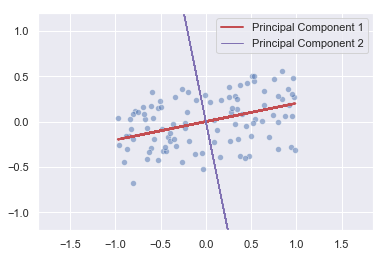

In [42]:
# Now plotting the principal component vectors
plt.plot(X_centered[:, 0], X_centered[:, 0] * V[1, 0]/V[0, 0], 'r', lw=2, label='Principal Component 1')
plt.plot(X_centered[:, 0], X_centered[:, 0] * V[1, 1]/V[0, 1], 'm', lw=1, label='Principal Component 2')
sns.scatterplot(X_centered[:, 0], X_centered[:, 1], alpha=0.5, palette='y')
sns.color_palette('bright')
plt.axis('equal')
plt.xlim([-(0.5+x_max), (0.5+x_max)])
plt.ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
plt.legend()

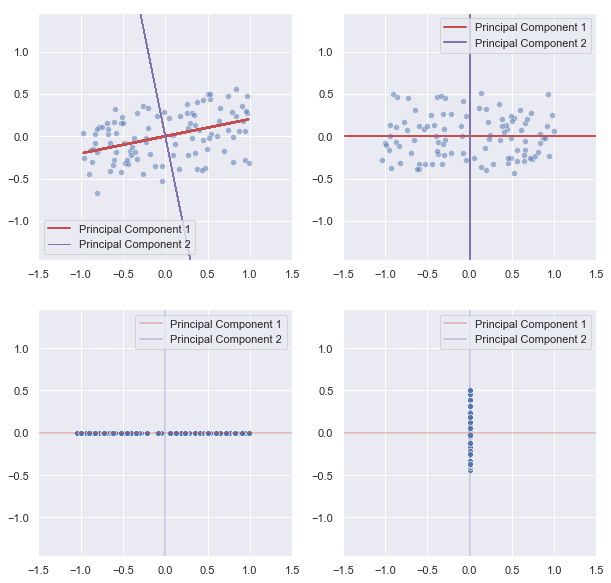

In [72]:
# Plotting original data and also the data after being rotated 
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Top Left with original Data and the Eigen Vectors
ax[0, 0].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 0]/V[0, 0], 'r', lw=2, label='Principal Component 1')
ax[0, 0].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 1]/V[0, 1], 'm', lw=1, label='Principal Component 2')
sns.scatterplot(X_centered[:, 0], X_centered[:, 1], alpha=0.5, palette='y', ax=ax[0, 0])
sns.color_palette('bright')
ax[0, 0].axis('equal')
ax[0, 0].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[0, 0].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[0, 0].legend()

# Bottom Left Using other matrices
ax[0, 1].plot(np.linspace(-2, 2, 101), np.linspace(-2, 2, 101) * 0, 'r', lw=2, label='Principal Component 1')
ax[0, 1].plot(np.linspace(-2, 2, 101) * 0, np.linspace(-2, 2, 101), 'm', lw=2, label='Principal Component 2')
sns.scatterplot((X_centered@V)[:, 0], (X_centered@V)[:, 1], alpha=0.5, palette='y', ax=ax[0, 1])
    # Can use the other snippet of code as follows:
    #sns.scatterplot((U@S)[:, 0], (U@S)[:, 1], alpha=0.5, palette='y', ax=ax[1, 0])
sns.color_palette('bright')
ax[0, 1].axis('equal')
ax[0, 1].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[0, 1].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[0, 1].legend()

# Bottom Left depicting projection on just the first principal component projections
ax[1, 0].plot(np.linspace(-2, 2, 101), np.linspace(-2, 2, 101) * 0, 'r', lw=2, label='Principal Component 1', alpha=0.3)
ax[1, 0].plot(np.linspace(-2, 2, 101) * 0, np.linspace(-2, 2, 101), 'm', lw=2, label='Principal Component 2', alpha=0.3)
# constructing the projection vector matrix in the new axes (principal component space)
proj_pc1 = np.stack([(U@S)[:, 0], [0]*len((U@S)[:, 0])], axis=1)
sns.scatterplot(proj_pc1[:, 0], proj_pc1[:, 1], alpha=1.0, palette='y', ax=ax[1, 0])
sns.color_palette('bright')
ax[1, 0].axis('equal')
ax[1, 0].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[1, 0].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[1, 0].legend()

# Bottom right depicting the projection on just the second principal component projections
ax[1, 1].plot(np.linspace(-2, 2, 101), np.linspace(-2, 2, 101) * 0, 'r', lw=2, label='Principal Component 1', alpha=0.3)
ax[1, 1].plot(np.linspace(-2, 2, 101) * 0, np.linspace(-2, 2, 101), 'm', lw=2, label='Principal Component 2', alpha=0.3)
# constructing the projection vector matrix in the new axes (principal component space)
proj_pc2 = np.stack([[0]*len((U@S)[:, 1]), (U@S)[:, 1]], axis=1)
sns.scatterplot(proj_pc2[:, 0], proj_pc2[:, 1], alpha=1.0, palette='y', ax=ax[1, 1])
sns.color_palette('bright')
ax[1, 1].axis('equal')
ax[1, 1].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[1, 1].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[1, 1].legend()

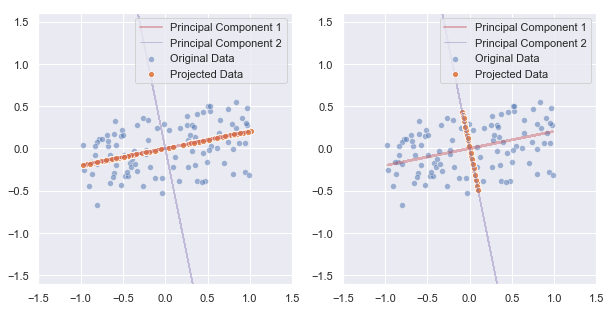

In [86]:
# Plotting the new projectsions (features) in the original feature spce
inv_pc1 = proj_pc1 @ Vt
inv_pc2 = proj_pc2 @ Vt

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# Left plot depicts the data which would be comstructed just by using the first feature
ax[0].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 0]/V[0, 0], 'r', lw=2, label='Principal Component 1', alpha=0.4)
ax[0].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 1]/V[0, 1], 'm', lw=1, label='Principal Component 2', alpha=0.4)
sns.scatterplot(X_centered[:, 0], X_centered[:, 1], alpha=0.5, palette='y', ax=ax[0], label='Original Data')
sns.scatterplot(inv_pc1[:, 0], inv_pc1[:, 1], alpha=1.0, palette='y', ax=ax[0], label='Projected Data')
sns.color_palette('bright')
ax[0].axis('equal')
ax[0].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[0].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[0].legend()


# Right plot depicts the data which would be comstructed just by using the second feature
ax[1].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 0]/V[0, 0], 'r', lw=2, label='Principal Component 1', alpha=0.4)
ax[1].plot(X_centered[:, 0], X_centered[:, 0] * V[1, 1]/V[0, 1], 'm', lw=1, label='Principal Component 2', alpha=0.4)
sns.scatterplot(X_centered[:, 0], X_centered[:, 1], alpha=0.5, palette='y', ax=ax[1], label='Original Data')
sns.scatterplot(inv_pc2[:, 0], inv_pc2[:, 1], alpha=1.0, palette='y', ax=ax[1], label='Projected Data')
sns.color_palette('bright')
ax[1].axis('equal')
ax[1].set_xlim([-(0.5+x_max), (0.5+x_max)])
ax[1].set_ylim([-(slope+0.5+y_max), slope + 0.5+y_max])
ax[1].legend()

## MNIST Reduced Dataset

This section will apply PCA on the MNIST Hand Written Digits (Reduced 8 X 8) Dataset such that the dimensionality reduces from 64 Dimensions to 2 Dimensions.

### Loading the dataset

In [107]:
digits = load_digits()
X = digits.data
y = digits.target

# Finding the shape of the Input Feature map
(m, n) = X.shape
m, n

(1797, 64)

In [108]:
# We want to reduce the data to a 2-Dimensional Reduction

# First we will zero center the input data
X = X - np.mean(X, axis = 0)

# Then apply SVD on X to get the U, Sigma, and Vt Matrices
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Finding V
V = Vt.T

# Diagonalizing S
S = np.diag(S)

In [109]:
# Finding the shapes of the matrices
U.shape, S.shape, Vt.shape

((1797, 64), (64, 64), (64, 64))

In [110]:
# Because we only want the first two features, we can get them as followsL
digits_features = (U@S)[:, :2]

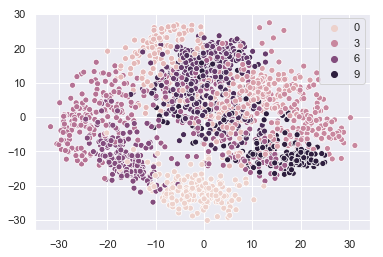

In [125]:
# Plotting the features on the 2-Dimensional Space using the target as the hue value
sns.scatterplot(digits_features[:, 0], digits_features[:, 1], hue=y, cmap='Paired')

## MNIST Dataset

This section will apply PCA on the MNIST Hand Written Digits Dataset such that the dimensionality reduces from 784 Dimensions to 2 Dimensions.

### Loading the dataset

In [135]:
digits = mnist.load_data()
(X_train, y_train), (X_test, y_test) = digits
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

# Finding the shape of the Input Feature map
m, n = X_train.shape
m, n

(60000, 784)

In [136]:
# We want to reduce the data to a 2-Dimensional Reduction

# First we will zero center the input data
X = X_train - np.mean(X_train, axis = 0)

# Then apply SVD on X to get the U, Sigma, and Vt Matrices
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Finding V
V = Vt.T

# Diagonalizing S
S = np.diag(S)

In [137]:
# Finding the shapes of the matrices
U.shape, S.shape, Vt.shape

((60000, 784), (784, 784), (784, 784))

In [138]:
# Because we only want the first two features, we can get them as followsL
digits_features = (U@S)[:, :2]

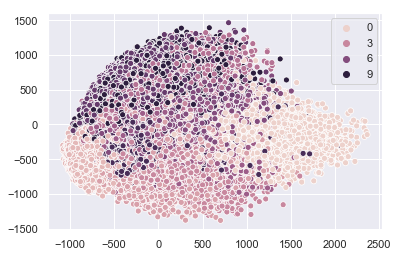

In [140]:
# Plotting the features on the 2-Dimensional Space using the target as the hue value
sns.scatterplot(digits_features[:, 0], digits_features[:, 1], hue=y_train, cmap='Paired')